In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('./data.csv')

In [54]:
df.head().T

0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                   2019      1956      1709     567.7      1575
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN

### EDA

#### Check Missing Data

In [55]:
df.shape

(569, 33)

In [56]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [58]:
df.dropna(axis=1, how='any', inplace=True)
#df.drop(columns='Unnamed: 32', inplace=True)

In [60]:
df.shape

(569, 32)

In [ ]:
# Create dummy variable for diagnosis
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

In [64]:
df['diagnosis_M'].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

### Plot

In [63]:
df.head(2)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302        17.99         10.38           122.8     1001.0   
1  842517        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33            184.6      2019.0   
1         0.1812  ...          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  diagnosis_M  
0          0.4601                  0.11890            1  
1          0.2750                  0.08902            1  

[2 rows x 32 columns]

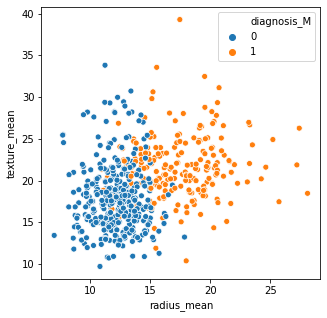

In [72]:
fig, axes = plt.subplots(figsize=(5, 5))

sns.scatterplot(x='radius_mean', y='texture_mean', data=df, hue='diagnosis_M')

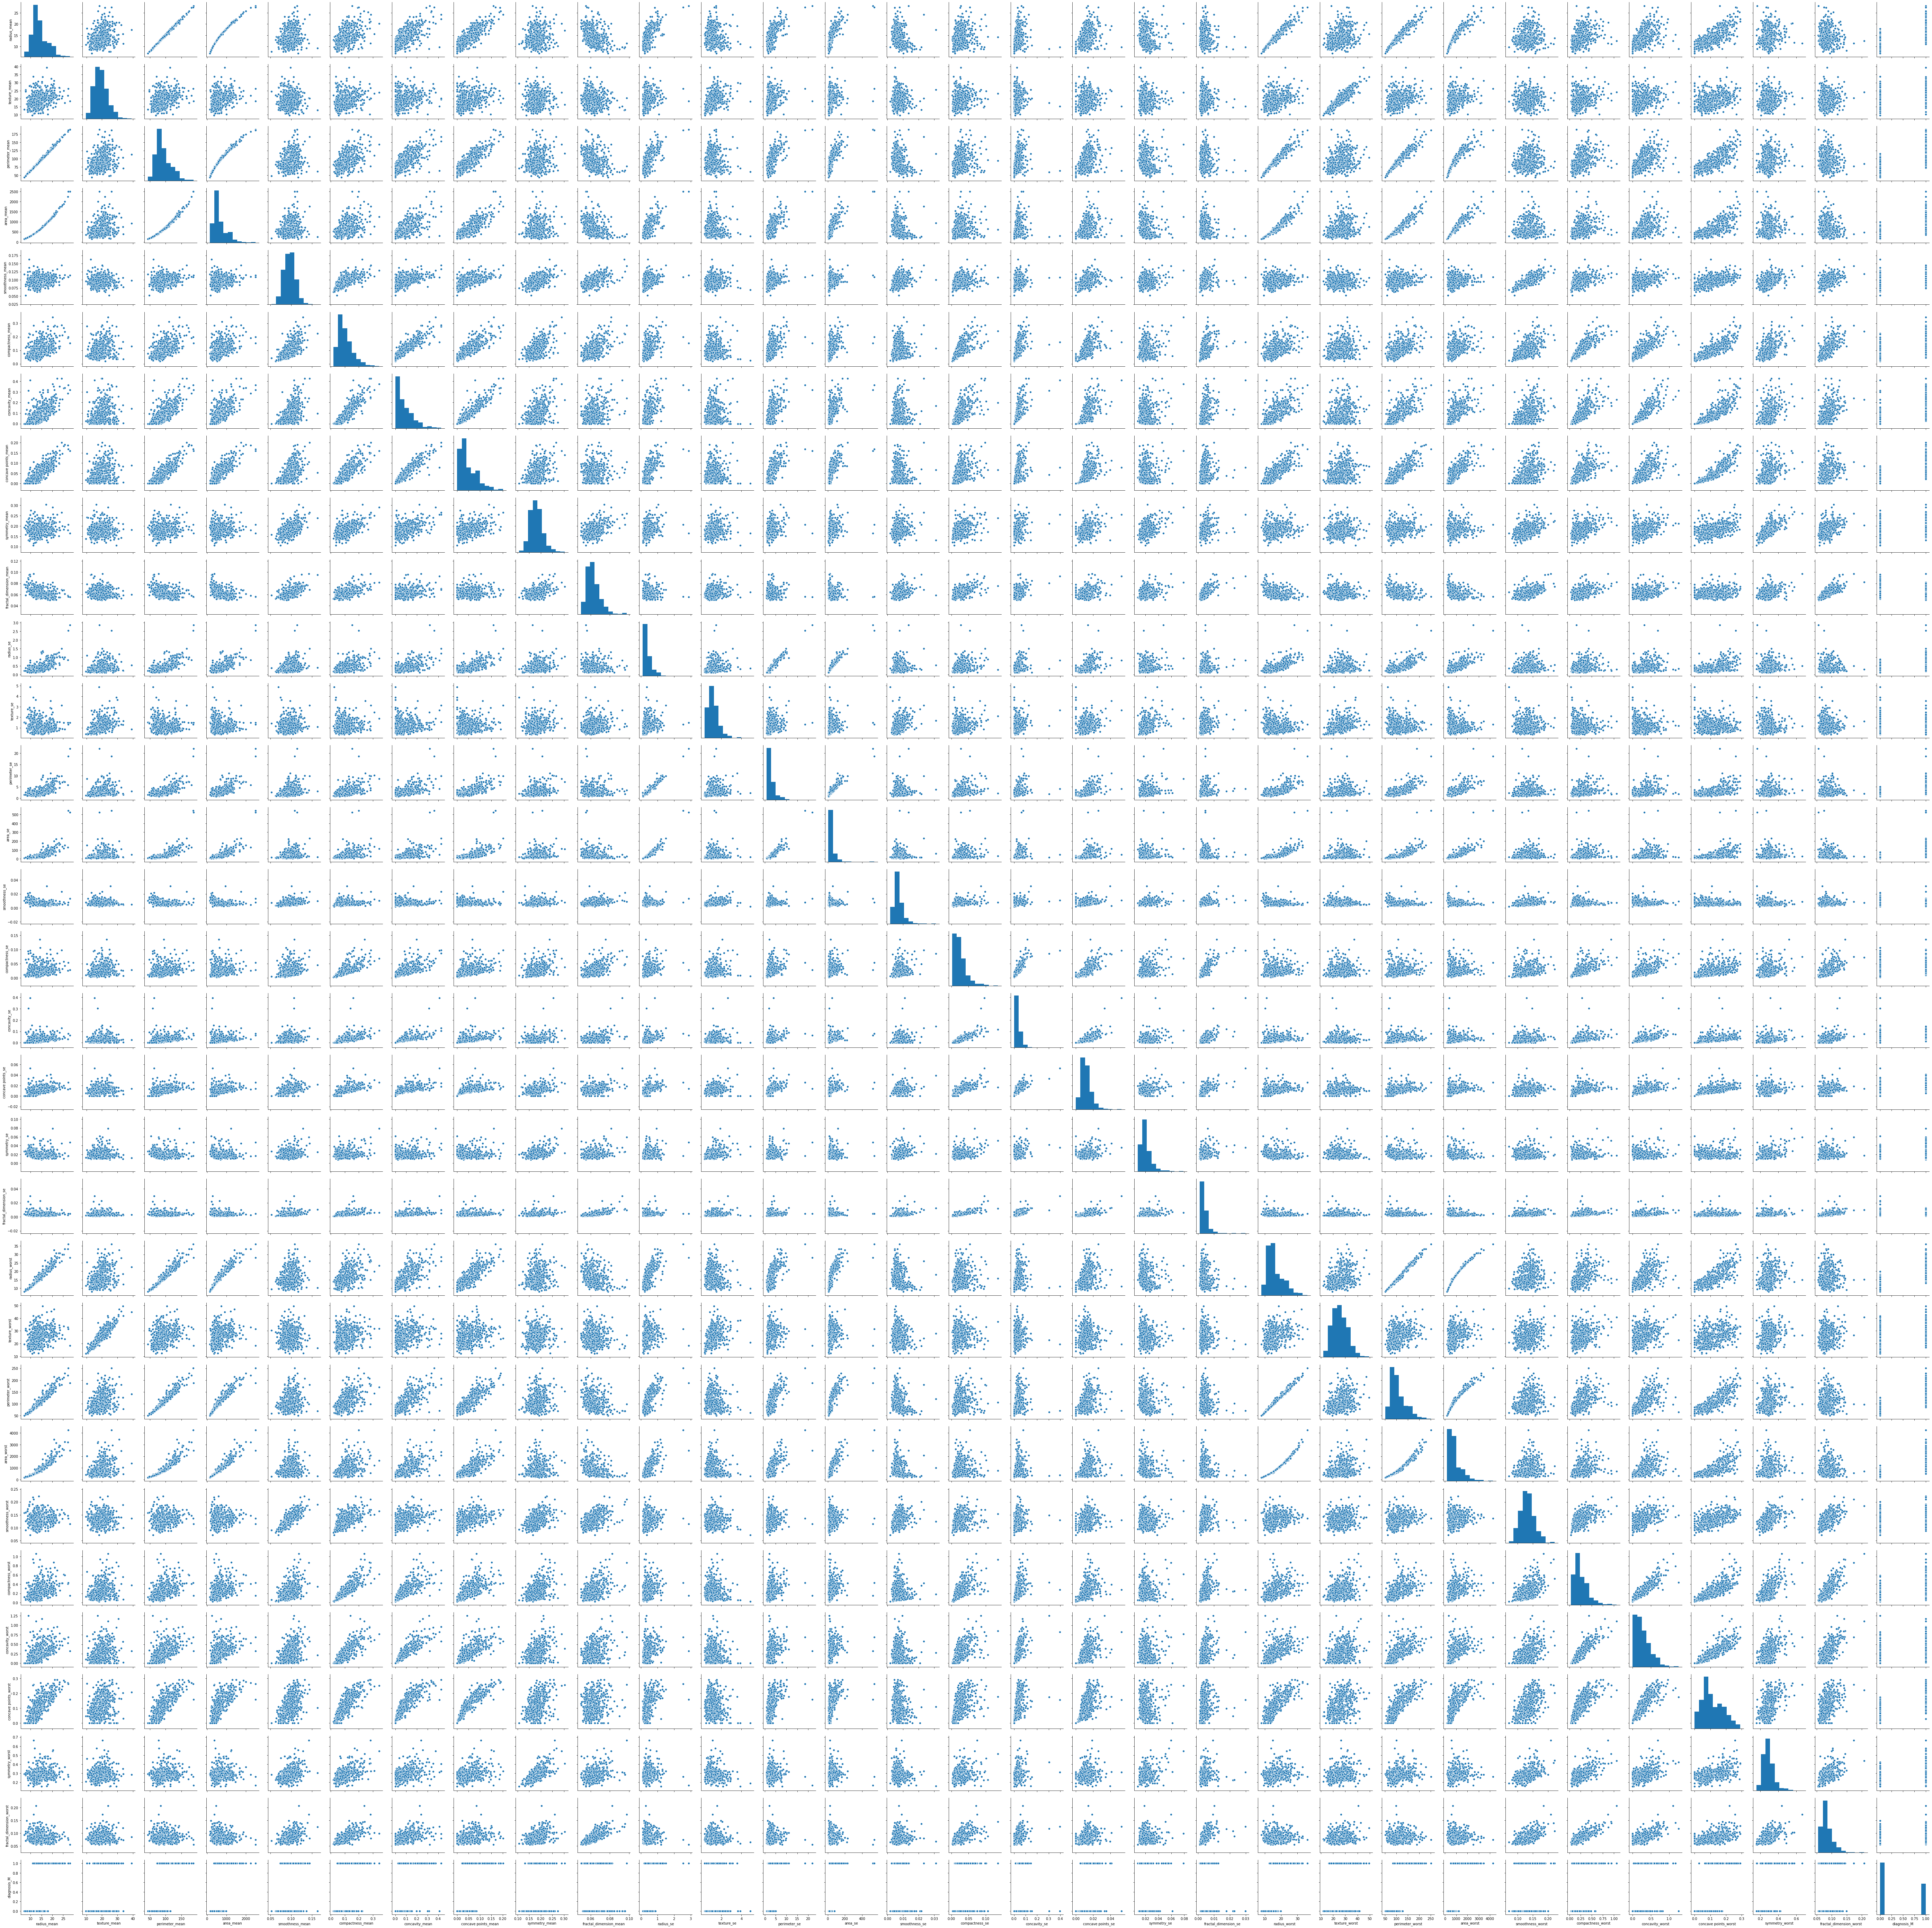

In [68]:
sns.pairplot(df.iloc[:,1:])